# **Chinook Database (Music Database)**

Data yang akan digunakan saat ini adalah data Chinook. Chinook adalah sebuah contoh database yang sering digunakan untuk demonstrasi dan latihan SQL. Database ini merupakan sebuah database musik yang menyerupai struktur database pada aplikasi toko musik digital. Data ini berasal dari query SQL yang terdiri dari beberapa tabel kemudian disatukan dalam bentuk CSV yang kemudian akan digunakan dalam eksplorasi lebih lanjut. Pengerjaan data kali ini berfokus pada eksplorasi dan pembersihan kemudian akan divisualisasikan menggunakan Tableau.
  

Sumber Data :
https://github.com/lerocha/chinook-database/tree/master/ChinookDatabase

Tableau Public :
https://public.tableau.com/app/profile/lungun.ali.rusky.simbolon/viz/MusicDatabaseChinook/Dashboard1?publish=yes

In [168]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

In [169]:
'''Load data dari csv'''

df = pd.read_csv('combined_music_data.csv', delimiter=',')

# Menampilkan semua kolom dalam output
pd.set_option('display.max_columns', None)


In [170]:
df.head()

,trackid,trackname,albumid,composer,milliseconds,bytes,unitprice,albumtitle,artistid,artistname,mediatypeid,mediatypename,genreid,genrename,invoiceid,customerid,invoicedate,billingaddress,billingcity,billingstate,billingcountry,billingpostalcode,invoicetotal,customerfirstname,customerlastname,customeraddress,customercity,customerstate,customercountry,invoicelinequantity,invoicelineunitprice
0,2,Balls to the Wall,2,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99,Balls to the Wall,2,Accept,2,Protected AAC audio file,1,Rock,1,2,2021-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,NaN,Germany,70174,1.98,Leonie,Köhler,Theodor-Heuss-Straße 34,Stuttgart,NaN,Germany,1,0.99
1,4,Restless and Wild,3,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99,Restless and Wild,2,Accept,2,Protected AAC audio file,1,Rock,1,2,2021-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,NaN,Germany,70174,1.98,Leonie,Köhler,Theodor-Heuss-Straße 34,Stuttgart,NaN,Germany,1,0.99
2,6,Put The Finger On You,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99,For Those About To Rock We Salute You,1,AC/DC,1,MPEG audio file,1,Rock,2,4,2021-01-02 00:00:00,Ullevålsveien 14,Oslo,NaN,Norway,0171,3.96,Bjørn,Hansen,Ullevålsveien 14,Oslo,NaN,Norway,1,0.99
3,8,Inject The Venom,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99,For Those About To Rock We Salute You,1,AC/DC,1,MPEG audio file,1,Rock,2,4,2021-01-02 00:00:00,Ullevålsveien 14,Oslo,NaN,Norway,0171,3.96,Bjørn,Hansen,Ullevålsveien 14,Oslo,NaN,Norway,1,0.99
4,10,Evil Walks,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99,For Those About To Rock We Salute You,1,AC/DC,1,MPEG audio file,1,Rock,2,4,2021-01-02 00:00:00,Ullevålsveien 14,Oslo,NaN,Norway,0171,3.96,Bjørn,Hansen,Ullevålsveien 14,Oslo,NaN,Norway,1,0.99


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   trackid               2240 non-null   int64  
 1   trackname             2240 non-null   object 
 2   albumid               2240 non-null   int64  
 3   composer              1646 non-null   object 
 4   milliseconds          2240 non-null   int64  
 5   bytes                 2240 non-null   int64  
 6   unitprice             2240 non-null   float64
 7   albumtitle            2240 non-null   object 
 8   artistid              2240 non-null   int64  
 9   artistname            2240 non-null   object 
 10  mediatypeid           2240 non-null   int64  
 11  mediatypename         2240 non-null   object 
 12  genreid               2240 non-null   int64  
 13  genrename             2240 non-null   object 
 14  invoiceid             2240 non-null   int64  
 15  customerid           

Terdapat beberapa kolom yang memiliki NaN seperti composer, billingstate, billingpostalcode, customerstate, selain itu terdapat kolom yang berupa tanggal namun tipe datanya tidak sesuai yaitu invoicedate. Selanjutnya untuk membantu proses analisa dan dengan tetap menjaga proporsi data, maka data NaN akan diisi sebagai unknown pada kolom kategorikal dan 0 pada kolom numerikal.

In [172]:
# Mengubah kolom 'InvoiceDate' menjadi tipe datetime (misalnya kolom tanggal adalah 'InvoiceDate')
df['invoicedate'] = pd.to_datetime(df['invoicedate'])

#Menambahkan kolom tanggal, bulan dan tahun dari invoicedate
# Membuat kolom baru untuk tanggal, bulan, dan tahun
df['Day'] = df['invoicedate'].dt.day
df['Month'] = df['invoicedate'].dt.month
df['Year'] = df['invoicedate'].dt.year

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   trackid               2240 non-null   int64         
 1   trackname             2240 non-null   object        
 2   albumid               2240 non-null   int64         
 3   composer              1646 non-null   object        
 4   milliseconds          2240 non-null   int64         
 5   bytes                 2240 non-null   int64         
 6   unitprice             2240 non-null   float64       
 7   albumtitle            2240 non-null   object        
 8   artistid              2240 non-null   int64         
 9   artistname            2240 non-null   object        
 10  mediatypeid           2240 non-null   int64         
 11  mediatypename         2240 non-null   object        
 12  genreid               2240 non-null   int64         
 13  genrename         

In [174]:
df.isna().sum()

trackid                    0
trackname                  0
albumid                    0
composer                 594
milliseconds               0
bytes                      0
unitprice                  0
albumtitle                 0
artistid                   0
artistname                 0
mediatypeid                0
mediatypename              0
genreid                    0
genrename                  0
invoiceid                  0
customerid                 0
invoicedate                0
billingaddress             0
billingcity                0
billingstate            1100
billingcountry             0
billingpostalcode        152
invoicetotal               0
customerfirstname          0
customerlastname           0
customeraddress            0
customercity               0
customerstate           1100
customercountry            0
invoicelinequantity        0
invoicelineunitprice       0
Day                        0
Month                      0
Year                       0
dtype: int64

In [175]:
'''Penangangan NaN'''

# Mengisi NaN dengan 'Unknown' untuk kolom kategorikal
categorical_columns = ['composer', 'billingstate', 'customerstate']
df[categorical_columns] = df[categorical_columns].fillna('unknown')

# Mengisi NaN dengan 0 untuk kolom numerikal
numerical_columns = ['billingpostalcode']
df[numerical_columns] = df[numerical_columns].fillna(0)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   trackid               2240 non-null   int64         
 1   trackname             2240 non-null   object        
 2   albumid               2240 non-null   int64         
 3   composer              2240 non-null   object        
 4   milliseconds          2240 non-null   int64         
 5   bytes                 2240 non-null   int64         
 6   unitprice             2240 non-null   float64       
 7   albumtitle            2240 non-null   object        
 8   artistid              2240 non-null   int64         
 9   artistname            2240 non-null   object        
 10  mediatypeid           2240 non-null   int64         
 11  mediatypename         2240 non-null   object        
 12  genreid               2240 non-null   int64         
 13  genrename         

In [177]:
#Menghapus kolom yang memiliki ID karena tidak akan digunakan dalam analisa

df = df.drop(['trackid','albumid','artistid','mediatypeid','genreid','invoiceid','customerid'],axis=1)

In [178]:
df.head()

,trackname,composer,milliseconds,bytes,unitprice,albumtitle,artistname,mediatypename,genrename,invoicedate,billingaddress,billingcity,billingstate,billingcountry,billingpostalcode,invoicetotal,customerfirstname,customerlastname,customeraddress,customercity,customerstate,customercountry,invoicelinequantity,invoicelineunitprice,Day,Month,Year
0,Balls to the Wall,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99,Balls to the Wall,Accept,Protected AAC audio file,Rock,2021-01-01,Theodor-Heuss-Straße 34,Stuttgart,unknown,Germany,70174,1.98,Leonie,Köhler,Theodor-Heuss-Straße 34,Stuttgart,unknown,Germany,1,0.99,1,1,2021
1,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99,Restless and Wild,Accept,Protected AAC audio file,Rock,2021-01-01,Theodor-Heuss-Straße 34,Stuttgart,unknown,Germany,70174,1.98,Leonie,Köhler,Theodor-Heuss-Straße 34,Stuttgart,unknown,Germany,1,0.99,1,1,2021
2,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99,For Those About To Rock We Salute You,AC/DC,MPEG audio file,Rock,2021-01-02,Ullevålsveien 14,Oslo,unknown,Norway,0171,3.96,Bjørn,Hansen,Ullevålsveien 14,Oslo,unknown,Norway,1,0.99,2,1,2021
3,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99,For Those About To Rock We Salute You,AC/DC,MPEG audio file,Rock,2021-01-02,Ullevålsveien 14,Oslo,unknown,Norway,0171,3.96,Bjørn,Hansen,Ullevålsveien 14,Oslo,unknown,Norway,1,0.99,2,1,2021
4,Evil Walks,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99,For Those About To Rock We Salute You,AC/DC,MPEG audio file,Rock,2021-01-02,Ullevålsveien 14,Oslo,unknown,Norway,0171,3.96,Bjørn,Hansen,Ullevålsveien 14,Oslo,unknown,Norway,1,0.99,2,1,2021


In [179]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print(f"Unique Values Count: {len(unique_values)}")
    print("-" * 40)

Column: trackname
Unique Values: ['Balls to the Wall' 'Restless and Wild' 'Put The Finger On You' ...
 'Sweet Lady Luck' 'Feirinha da Pavuna/Luz do Repente/Bagaço da Laranja'
 'Samba pras moças']
Unique Values Count: 1888
----------------------------------------
Column: composer
Unique Values: ['U. Dirkschneider, W. Hoffmann, H. Frank, P. Baltes, S. Kaufmann, G. Hoffmann'
 'F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman'
 'Angus Young, Malcolm Young, Brian Johnson' 'AC/DC'
 'Steven Tyler, Joe Perry' 'Steven Tyler, Tom Hamilton'
 'Steven Tyler, Jim Vallance' 'Steven Tyler, Desmond Child'
 'Alanis Morissette & Glenn Ballard' 'Jerry Cantrell'
 'Jerry Cantrell, Michael Starr, Layne Staley' 'unknown' 'Apocalyptica'
 'Audioslave/Chris Cornell' 'Cornell, Commerford, Morello, Wilk'
 'Chuck Berry' 'Billy Cobham'
 'Tony Iommi, Bill Ward, Geezer Butler, Ozzy Osbourne' 'Roy Z'
 'Al Perkins/Willie Dixon' 'Tom Jobim - Newton Mendoça' 'Caetano Veloso'
 'Chico Science'
 'Bino F

Berdasarkan pemeriksaan pada unique values ada beberapa data pada kolom tertentu yang harus ditangani seperti :
  
Genre : 'Easy Listening', 'World', 'TV Shows', 'Science Fiction','Sci Fi & Fantasy', 'Drama', 'Comedy'  
(Genre tersebut lebih mengarah ke genre film/drama dari pada musik)

Year : 2024, 2025
(Saat data ini diolah masih dalam pertengahan tahun 2024)
  
Data-data tersebut akan di drop karena tidak sesuai.

In [180]:
import pandas as pd

# Menghapus baris berdasarkan Genre
genres_to_remove = ['Easy Listening', 'World', 'TV Shows', 'Science Fiction', 'Sci Fi & Fantasy', 'Drama', 'Comedy']
df = df[~df['genrename'].isin(genres_to_remove)]

# Kondisi untuk menghapus baris berdasarkan Year
years_to_remove = [2024,2025]
df = df[~df['Year'].isin(years_to_remove)]

# Menyimpan DataFrame yang sudah difilter ke dalam file baru (opsional)
df.to_csv('filtered_data.csv', index=False)

# **Exploratory Data Analysis**

C:\Users\asus\AppData\Local\Temp\ipykernel_2024\4185938045.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='purchases', y='genrename', data=track_sales, palette='viridis')


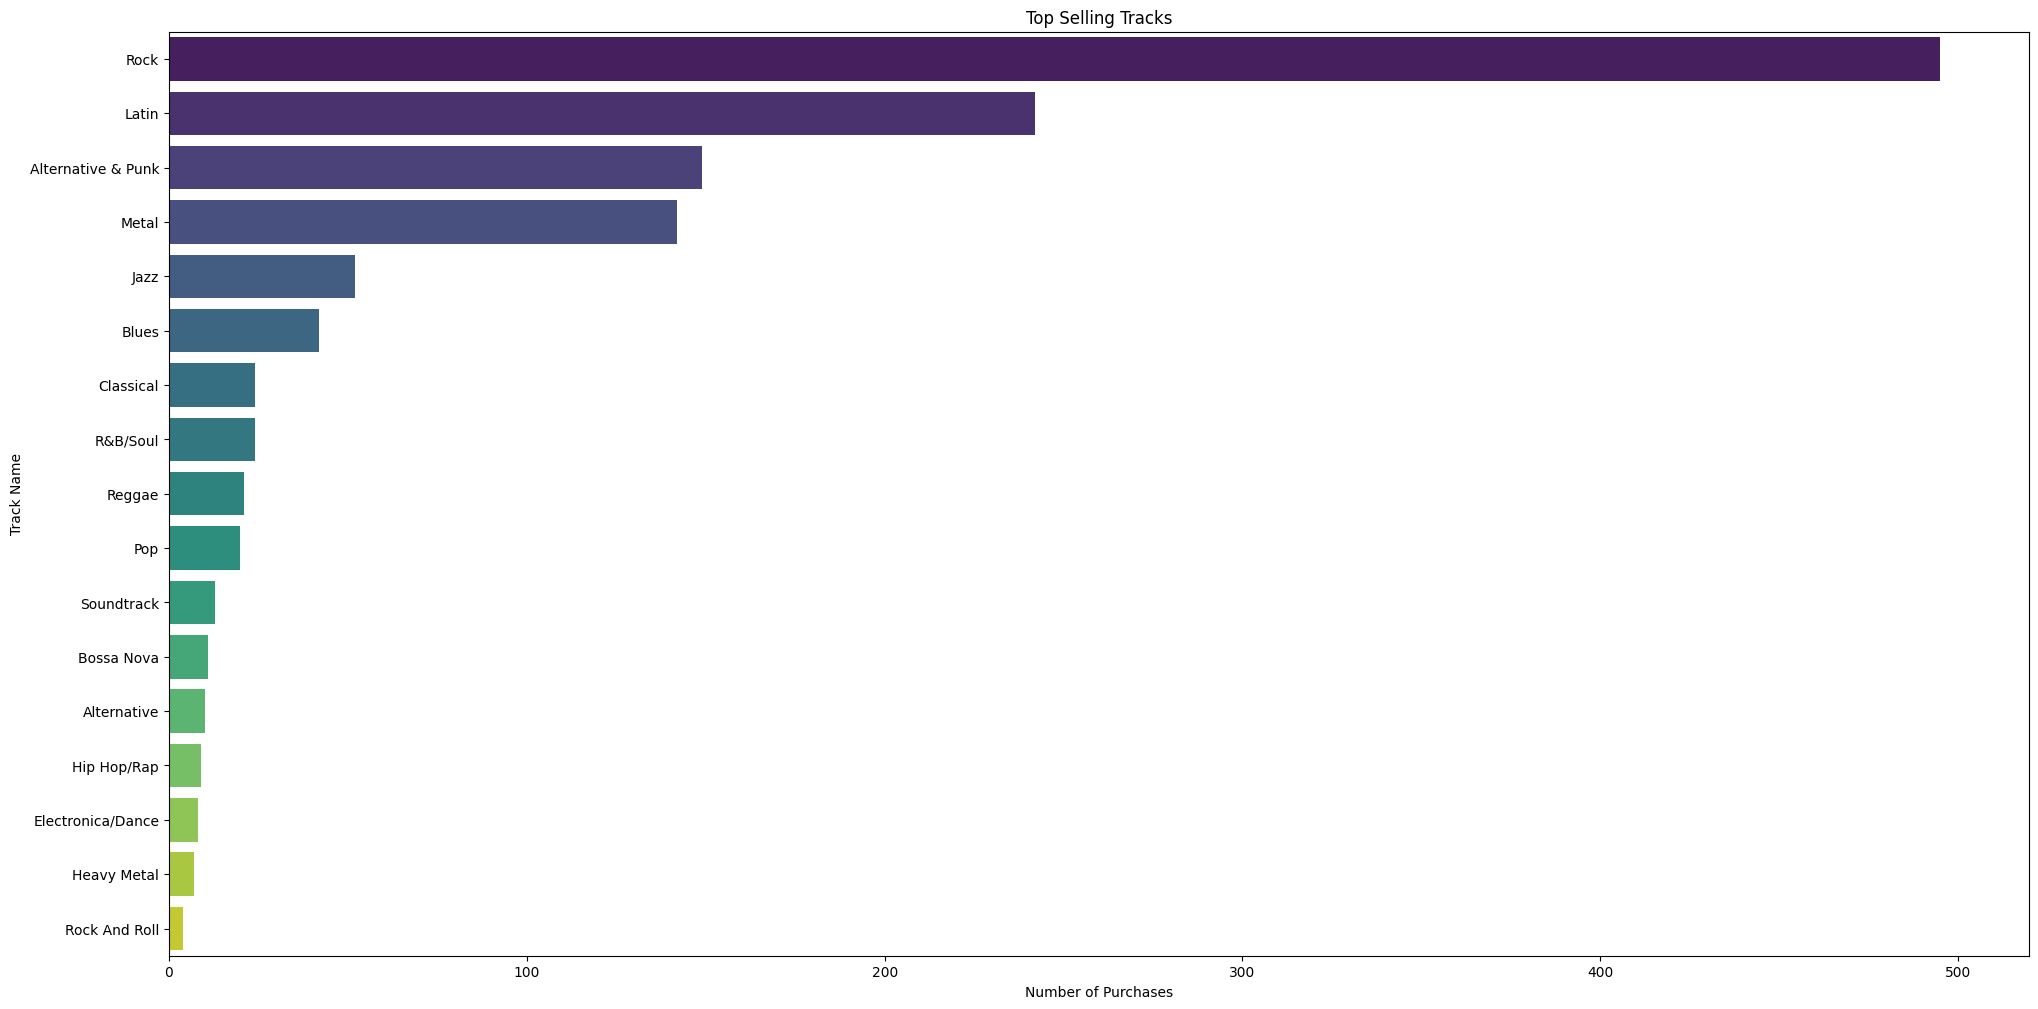

In [181]:
# Menghitung jumlah pembelian untuk setiap genre dan mengurutkan dari pembelian terbanyak
track_sales = df.groupby('genrename').size().reset_index(name='purchases')
track_sales = track_sales.sort_values(by='purchases', ascending=False)

plt.figure(figsize=(24, 12))
sns.barplot(x='purchases', y='genrename', data=track_sales, palette='viridis')
plt.xlabel('Number of Purchases')
plt.ylabel('Track Name')
plt.title('Top Selling Tracks')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_2024\232455437.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_genre_sales, x='invoicetotal', y='billingcountry', palette='viridis')


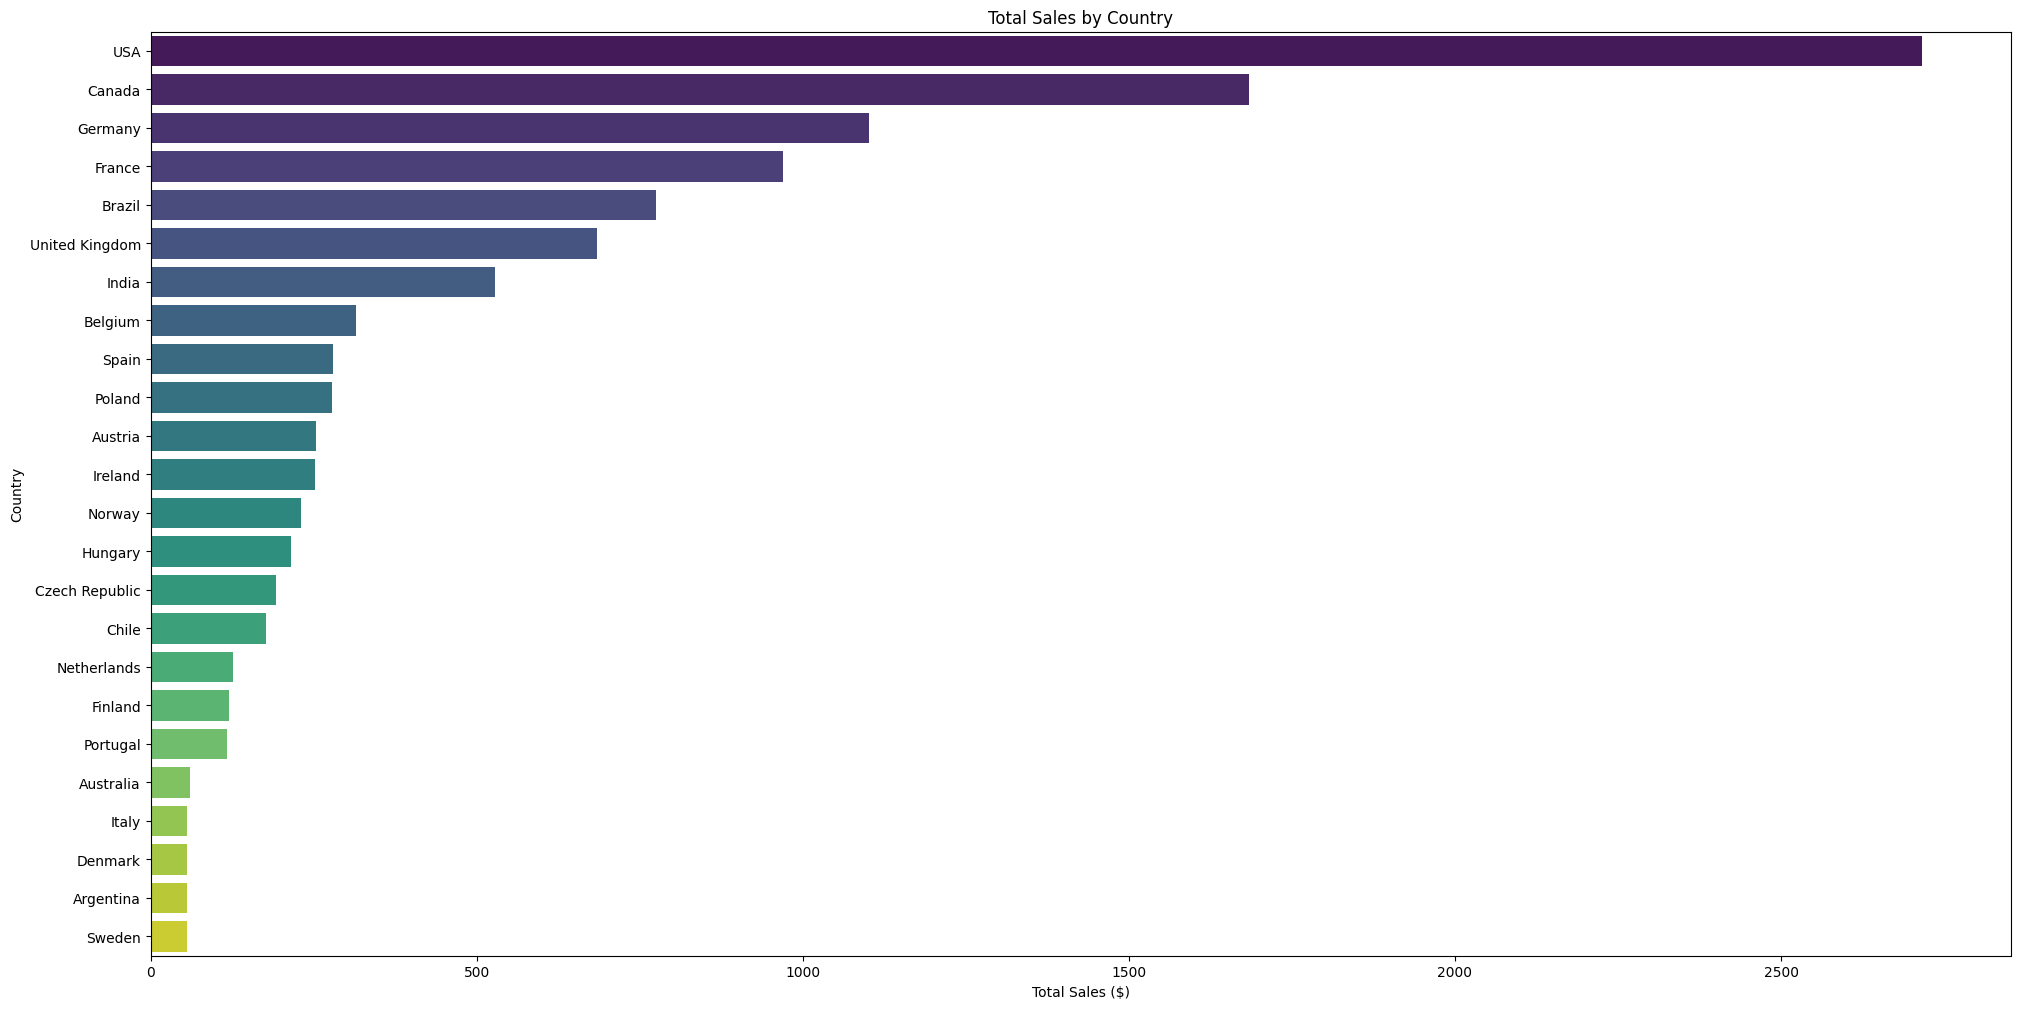

In [182]:
# Mengelompokkan data berdasarkan genre dan menghitung total penjualan per genre
df_genre_sales = df.groupby('billingcountry')['invoicetotal'].sum().reset_index()

# Mengurutkan data berdasarkan total penjualan terbanyak
df_genre_sales = df_genre_sales.sort_values(by='invoicetotal', ascending=False)

# Membuat visualisasi total penjualan berdasarkan genre
plt.figure(figsize=(24, 12))
sns.barplot(data=df_genre_sales, x='invoicetotal', y='billingcountry', palette='viridis')
plt.title('Total Sales by Country')
plt.xlabel('Total Sales ($)')
plt.ylabel('Country')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_2024\2469579808.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='purchases', y='billingcountry', data=country_sales, palette='viridis')


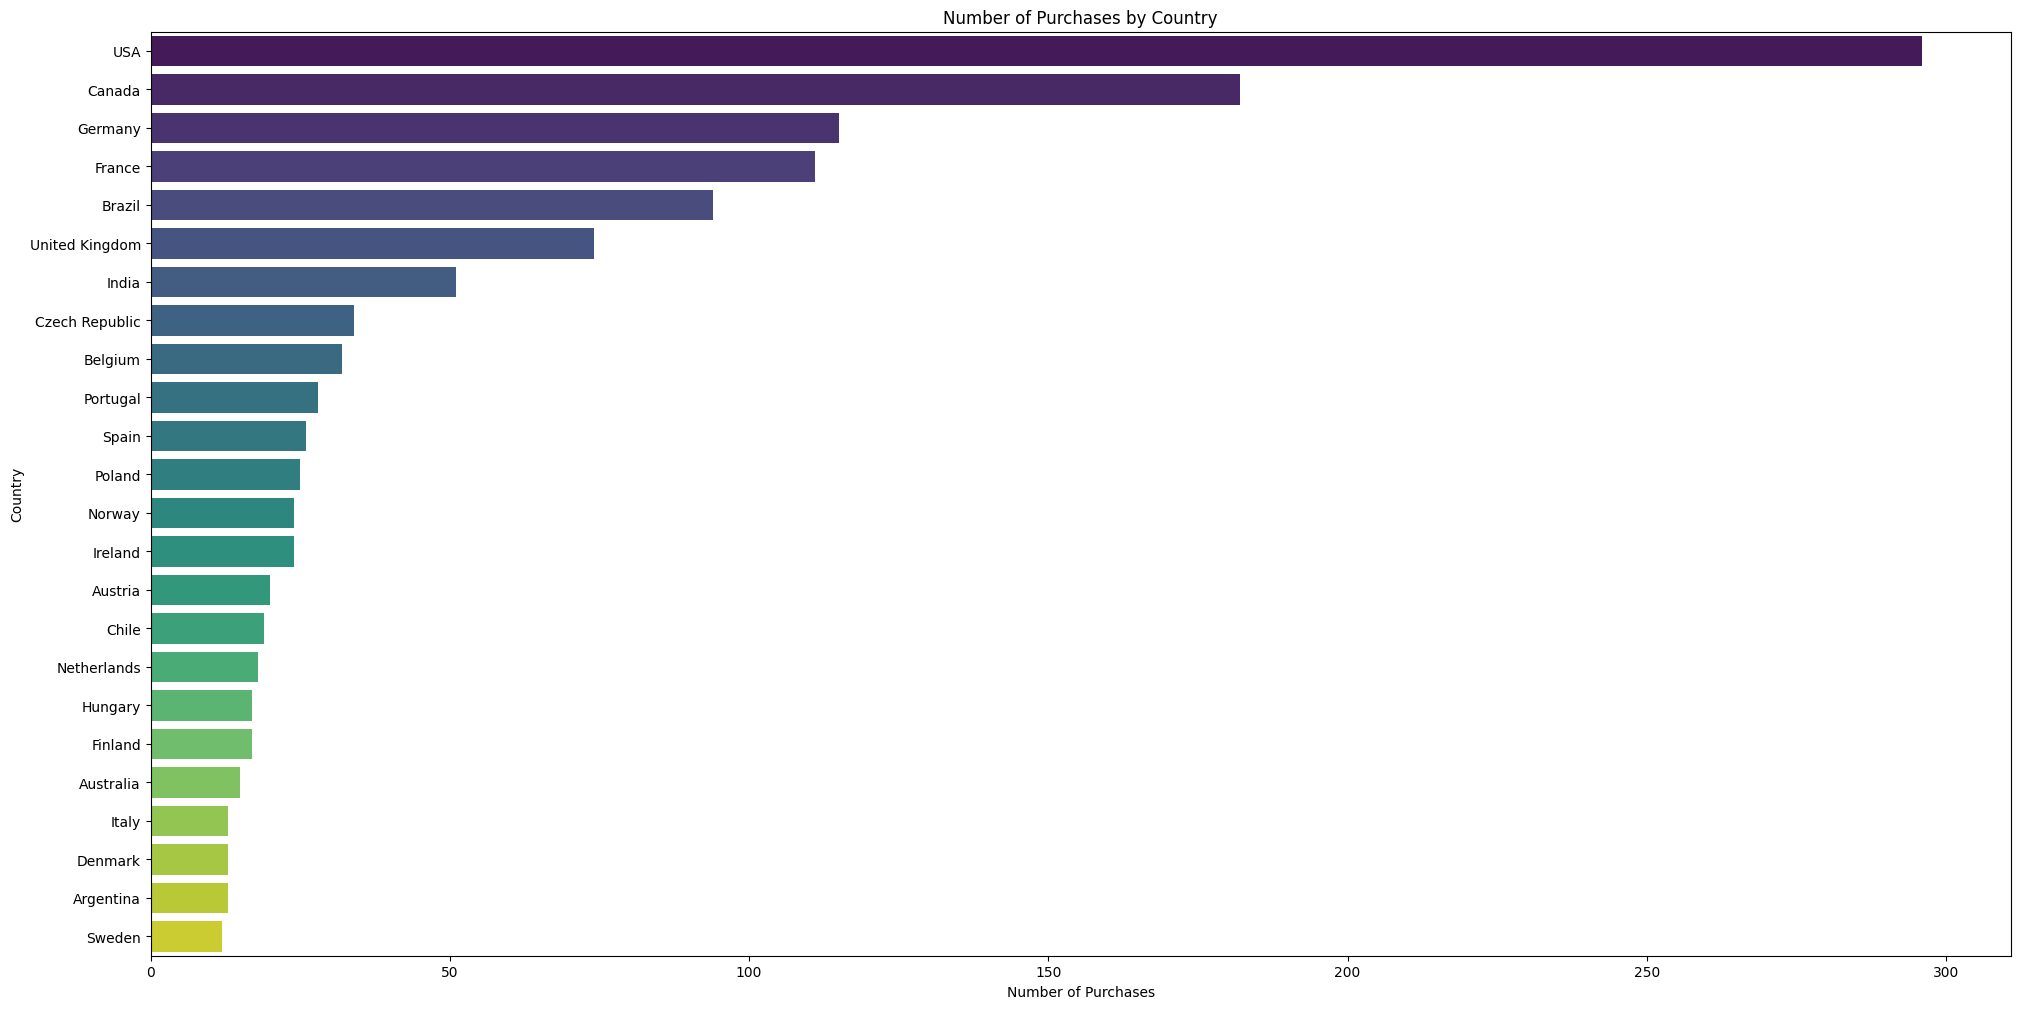

In [183]:
# Menghitung jumlah pembelian lagu pernegara dan diurutkan dari yang terbanyak
country_sales = df.groupby('billingcountry').size().reset_index(name='purchases')
country_sales = country_sales.sort_values(by='purchases', ascending=False)

plt.figure(figsize=(24, 12))
sns.barplot(x='purchases', y='billingcountry', data=country_sales, palette='viridis')
plt.xlabel('Number of Purchases')
plt.ylabel('Country')
plt.title('Number of Purchases by Country')
plt.show()

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without ass

<Figure size 2400x1200 with 0 Axes>

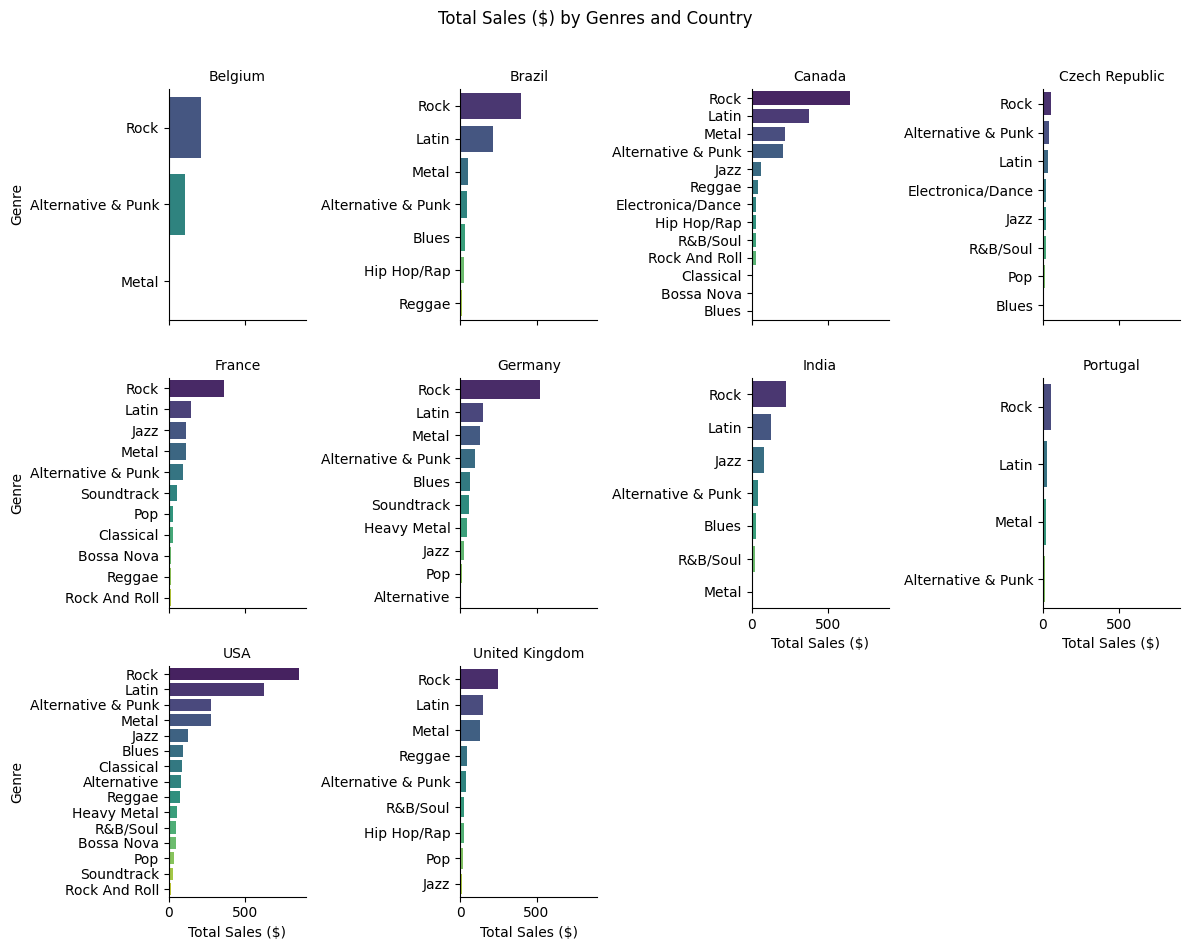

In [184]:
# 10 Negara dengan jumlah purchase terbesar
countries = ['USA','Canada','Germany','France','Brazil','United Kingdom','India','Czech Republic','Belgium','Portugal']

# Filter data berdasarkan negara tertentu
df_country = df[df['billingcountry'].isin(countries)]

df_genre_counts = df_country.groupby(['billingcountry', 'genrename'])['invoicetotal'].sum().reset_index()

# Mengurutkan berdasarkan total pemutaran terbanyak per negara
df_genre_counts = df_genre_counts.sort_values(by=['billingcountry', 'invoicetotal'], ascending=[True, False])

# Membuat visualisasi dalam satu grafik menggunakan FacetGrid
plt.figure(figsize=(24, 12))
g = sns.FacetGrid(df_genre_counts, col='billingcountry', col_wrap=4, height=3, sharey=False)
g.map(sns.barplot, 'invoicetotal', 'genrename', palette='viridis')
g.set_titles("{col_name}")
g.set_axis_labels('Total Sales ($)', 'Genre')
plt.tight_layout()
plt.suptitle('Total Sales ($) by Genres and Country', y=1.05)
plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_2024\159062568.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='invoicetotal', y='billingcity', data=df_country_plot, palette='viridis')
C:\Users\asus\AppData\Local\Temp\ipykernel_2024\159062568.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='invoicetotal', y='billingcity', data=df_country_plot, palette='viridis')
C:\Users\asus\AppData\Local\Temp\ipykernel_2024\159062568.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='invoicetotal', y='billingcity', data=df_country_plot, palet

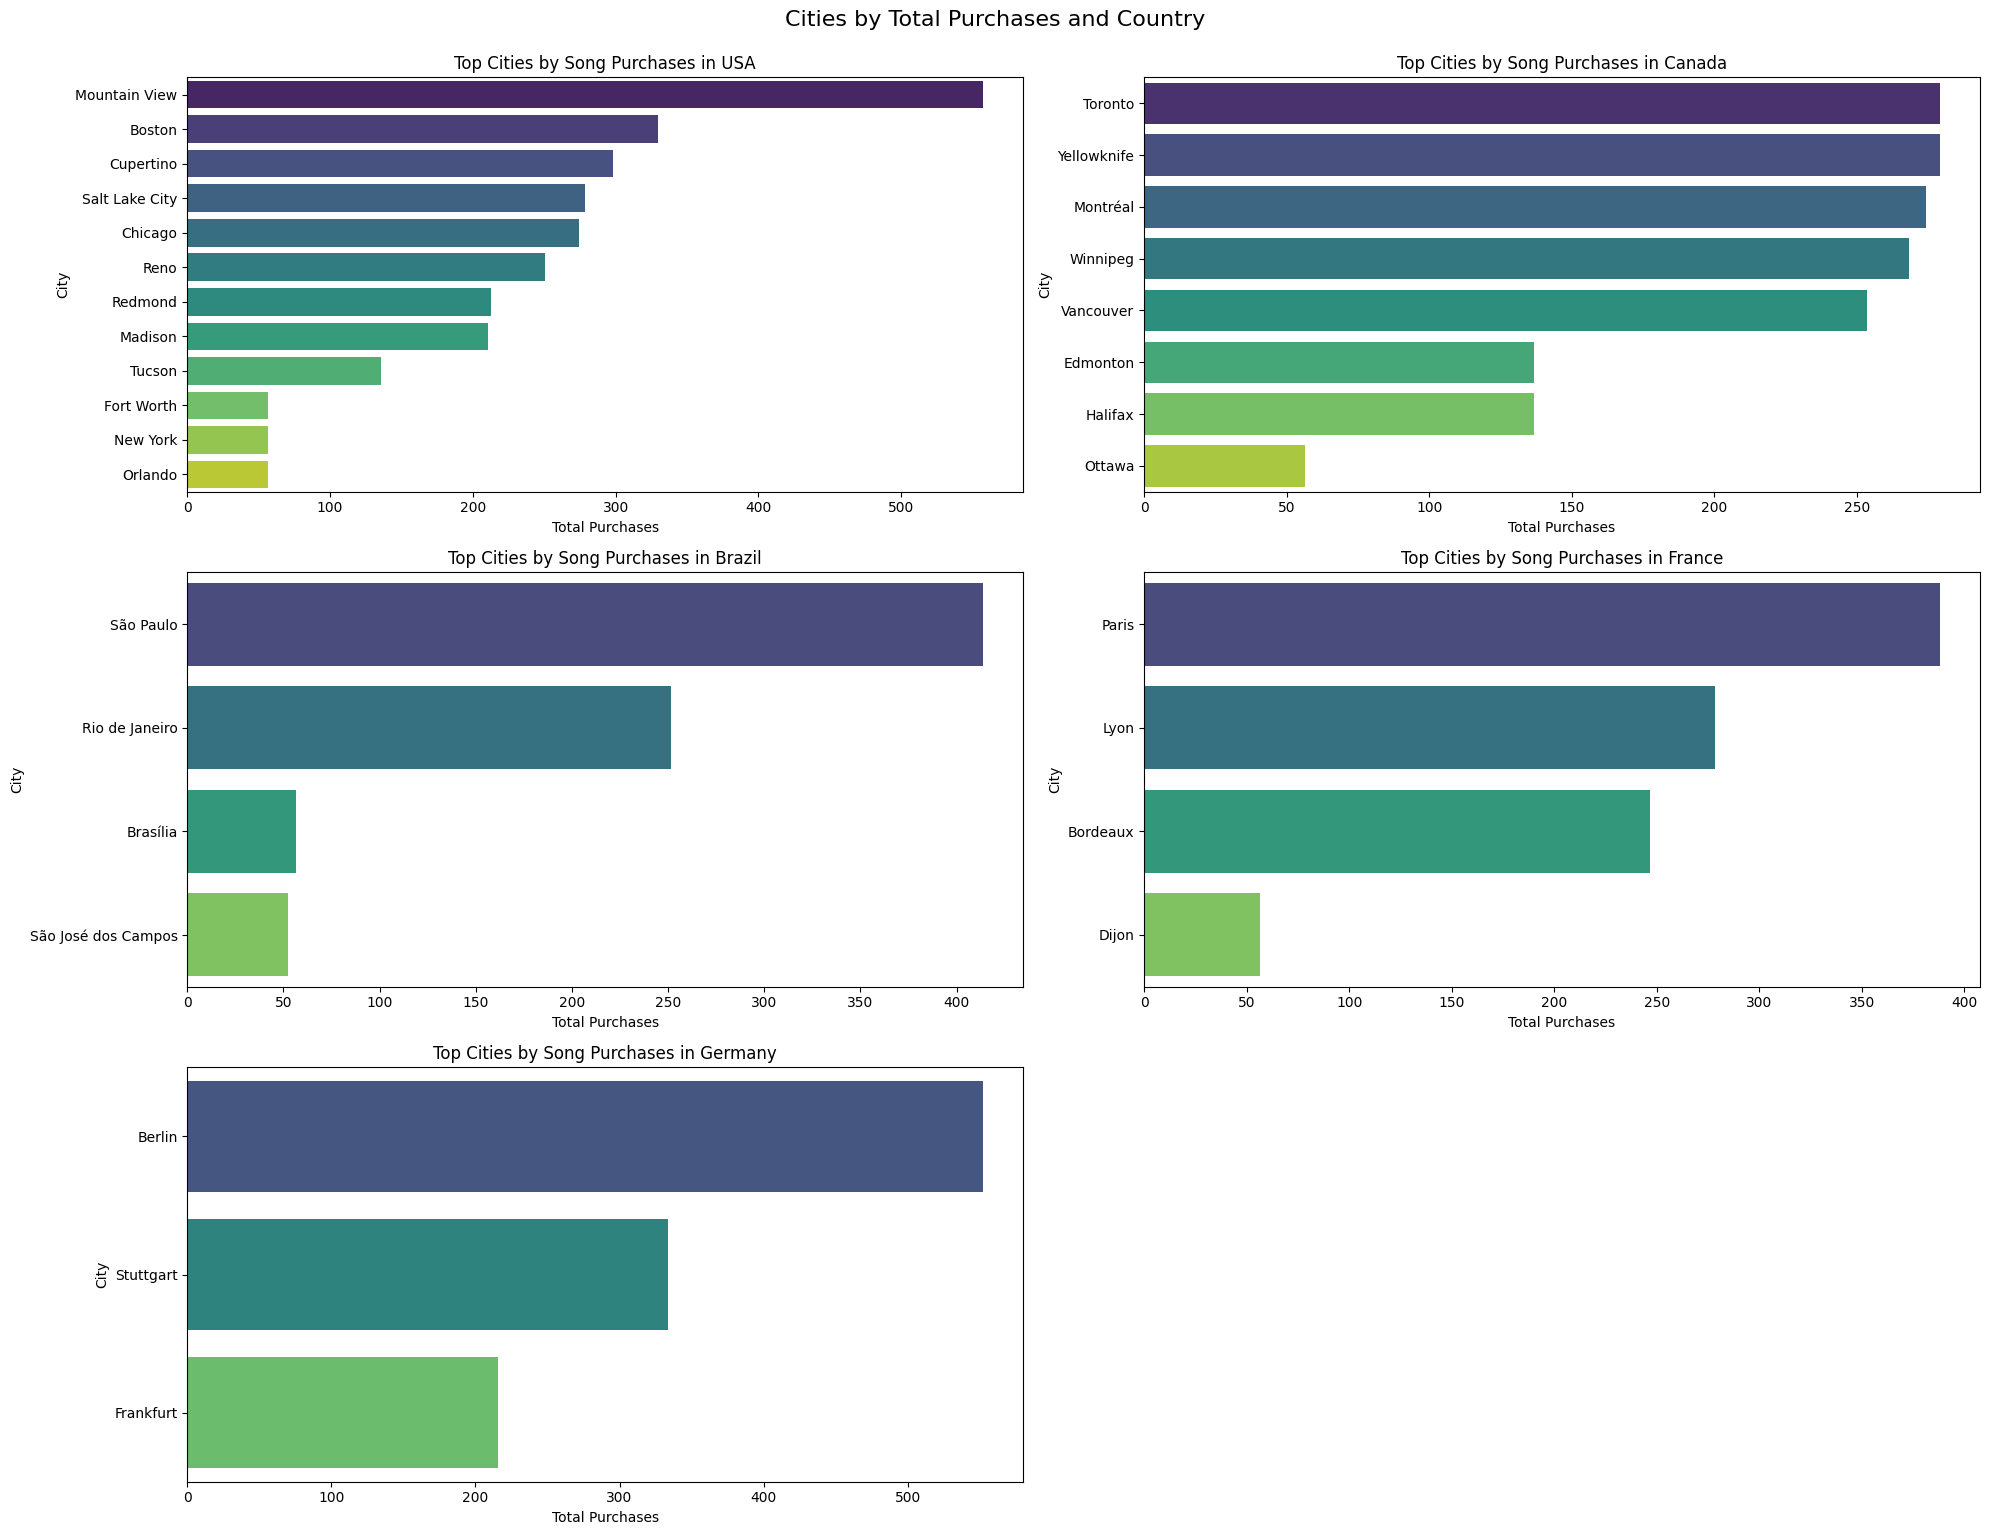

In [185]:
# Negara-negara yang ingin dianalisis
countries = ['USA', 'Canada', 'Brazil', 'France', 'Germany']

# Filter data berdasarkan negara tertentu
df_country = df[df['billingcountry'].isin(countries)]

# Menghitung total pemutaran per kota dan per negara
df_city_counts = df_country.groupby(['billingcountry', 'billingcity'])['invoicetotal'].sum().reset_index()

# Mengurutkan berdasarkan total pemutaran terbanyak per negara
df_city_counts = df_city_counts.sort_values(by=['billingcountry', 'invoicetotal'], ascending=[True, False])

# Membuat visualisasi dalam satu gambar per negara
plt.figure(figsize=(20, 15))

# Loop untuk setiap negara dan membuat subplot
for i, country in enumerate(countries, 1):
    plt.subplot(3, 2, i)
    df_country_plot = df_city_counts[df_city_counts['billingcountry'] == country]
    sns.barplot(x='invoicetotal', y='billingcity', data=df_country_plot, palette='viridis')
    plt.title(f'Top Cities by Song Purchases in {country}')
    plt.xlabel('Total Purchases')
    plt.ylabel('City')

plt.tight_layout()
plt.suptitle('Cities by Total Purchases and Country', y=1.02, fontsize=16)
plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_2024\2368236624.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='invoicelinequantity', y='trackname', data=df_genre_plot.sort_values(by='invoicelinequantity', ascending=False), palette='viridis')
C:\Users\asus\AppData\Local\Temp\ipykernel_2024\2368236624.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='invoicelinequantity', y='trackname', data=df_genre_plot.sort_values(by='invoicelinequantity', ascending=False), palette='viridis')
C:\Users\asus\AppData\Local\Temp\ipykernel_2024\2368236624.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` an

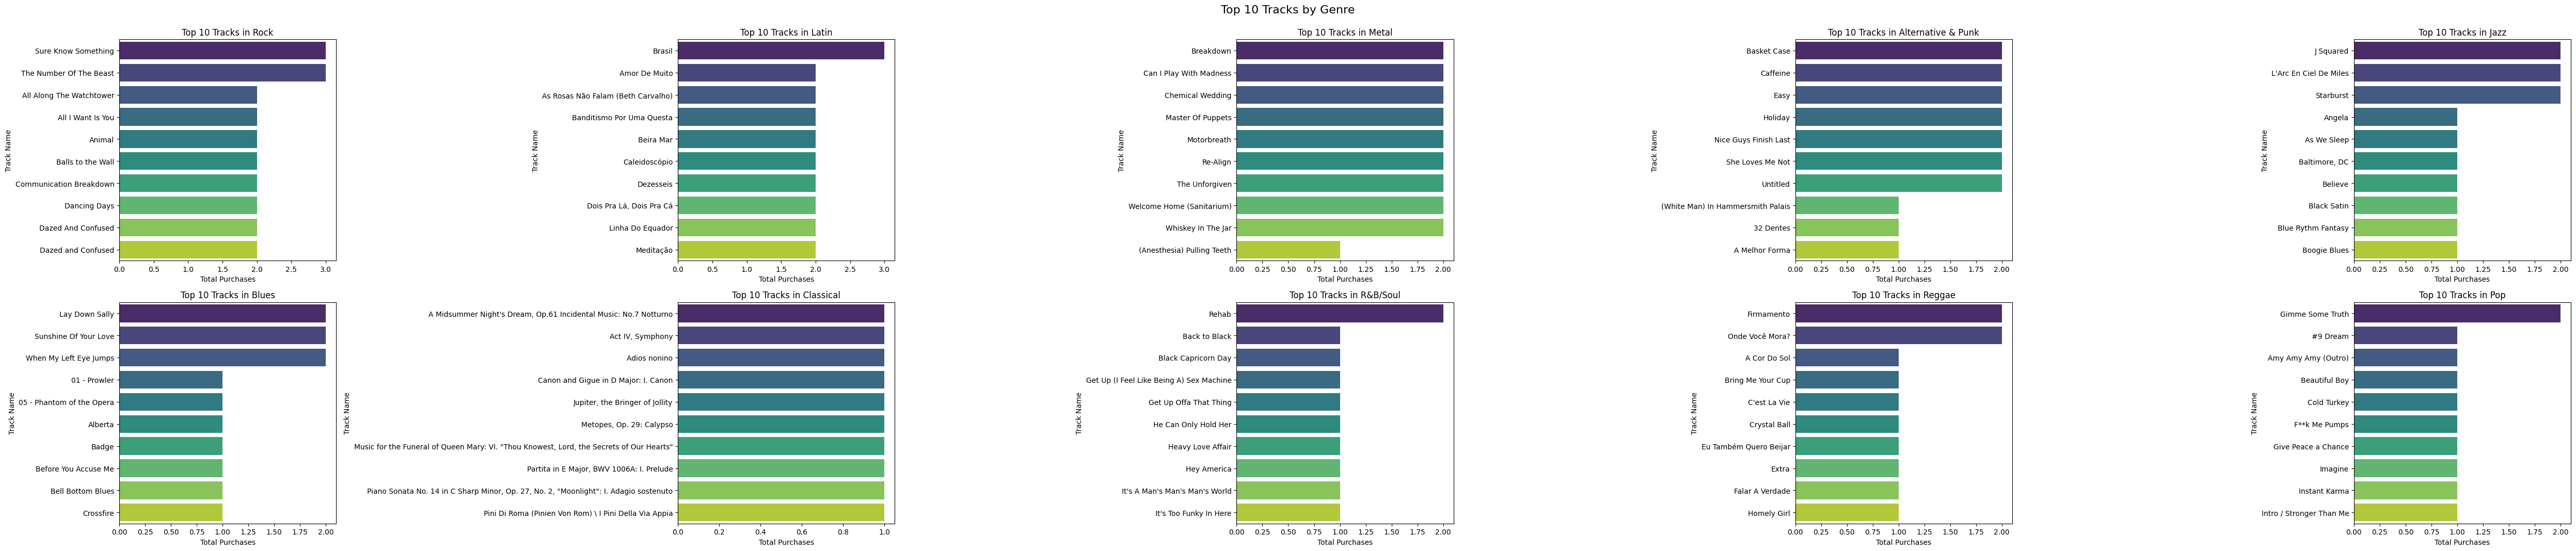

In [186]:
# Genre yang ingin dianalisis
genres = ['Rock','Latin','Metal','Alternative & Punk','Jazz','Blues','Classical','R&B/Soul','Reggae','Pop']

# Filter data berdasarkan negara tertentu
df_genres = df[df['genrename'].isin(genres)]

# Mengelompokkan dan menghitung jumlah pembelian per lagu per genre
df_genre_track_counts = df.groupby(['genrename', 'trackname'])['invoicelinequantity'].sum().reset_index()

# Mengurutkan berdasarkan jumlah pembelian terbanyak per genre dan memilih 10 lagu teratas untuk setiap genre
df_genre_track_counts['rank'] = df_genre_track_counts.groupby('genrename')['invoicelinequantity'].rank(method='first', ascending=False)
df_top10_tracks_per_genre = df_genre_track_counts[df_genre_track_counts['rank'] <= 10]

# Membuat visualisasi
plt.figure(figsize=(50, 15))

for i, genre in enumerate(genres, 1):
    plt.subplot((len(genres) // 5) + 1, 5, i)
    df_genre_plot = df_top10_tracks_per_genre[df_top10_tracks_per_genre['genrename'] == genre]
    sns.barplot(x='invoicelinequantity', y='trackname', data=df_genre_plot.sort_values(by='invoicelinequantity', ascending=False), palette='viridis')
    plt.title(f'Top 10 Tracks in {genre}')
    plt.xlabel('Total Purchases')
    plt.ylabel('Track Name')

plt.tight_layout()
plt.suptitle('Top 10 Tracks by Genre', y=1.02, fontsize=16)
plt.show()


<Figure size 1500x1000 with 0 Axes>

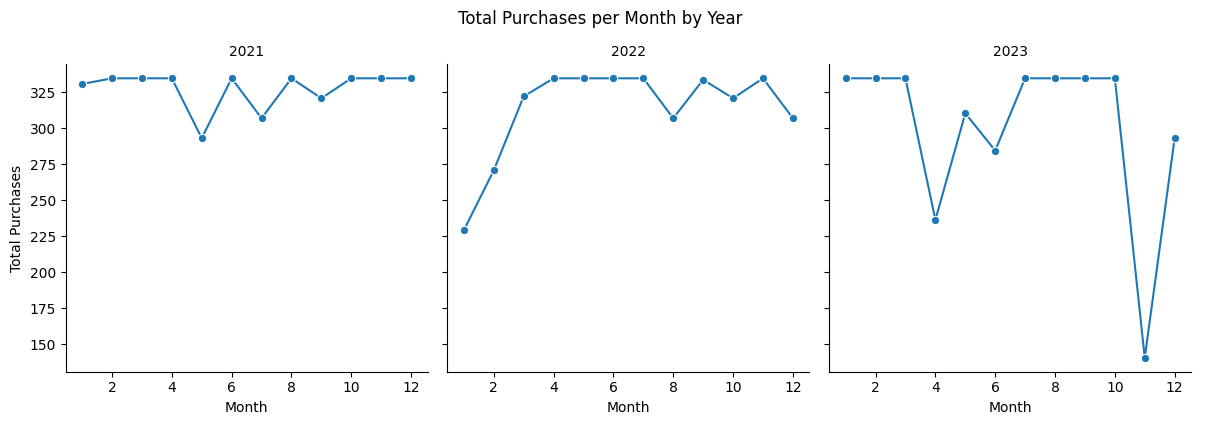

In [187]:
# Mengelompokkan data berdasarkan tahun dan bulan dan menghitung jumlah pembelian per bulan
df_monthly_sales = df.groupby(['Year', 'Month'])['invoicetotal'].sum().reset_index()

# Menambahkan kolom 'Month-Year' untuk mempermudah visualisasi
df_monthly_sales['Month-Year'] = df_monthly_sales['Year'].astype(str) + '-' + df_monthly_sales['Month'].astype(str).str.zfill(2)

# Membuat visualisasi dalam satu grafik menggunakan FacetGrid
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df_monthly_sales, col='Year', col_wrap=3, height=4, sharey=True)
g.map(sns.lineplot, 'Month', 'invoicetotal', marker='o')
g.set_titles("{col_name}")
g.set_axis_labels('Month', 'Total Purchases')
g.add_legend()
plt.tight_layout()
plt.suptitle('Total Purchases per Month by Year', y=1.05)
plt.show()
